# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')
print(ss)
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, {'neg': 0.01, 'neu': 0.745, 'pos': 0.245, 'compound': 0.9975}


<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from math import log
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm_notebook
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [3]:
data = pd.read_csv('preprocessed_data.csv',nrows=50000)

In [4]:
data.shape
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
essay_ar_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(33500, 8) (33500,)
(16500, 8) (16500,)
After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
school_state_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_state_tfidf = vectorizer.transform(X_train['school_state'].values)
X_test_state_tfidf = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_tfidf.shape, y_train.shape)
print(X_test_state_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [134]:
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
teacher_prefix_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_tfidf = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_tfidf = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_tfidf.shape, y_train.shape)
print(X_test_teacher_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [135]:
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data
clean_categories_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_tfidf = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_tfidf = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_tfidf.shape, y_train.shape)
print(X_test_clean_categories_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 7) (33500,)
(16500, 7) (16500,)
['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']


In [136]:
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
clean_subcategories_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_tfidf = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_tfidf = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_tfidf.shape, y_train.shape)
print(X_test_clean_subcategories_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 28) (33500,)
(16500, 28) (16500,)
['appliedsciences', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts']


In [137]:
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
project_grade_category_tfidf = vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_tfidf = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_tfidf = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_tfidf.shape, y_train.shape)
print(X_test_grade_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [12]:
#https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer
def analyze_sentiment(df):
    df1 = pd.DataFrame()
    sentiments = []
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        if i % 1000 == 0:
            print(i)
        line = df['essay'].iloc[i]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])
    df1[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    return df1

In [13]:
pol = analyze_sentiment(X_train)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


In [14]:
pol_te = analyze_sentiment(X_test)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


In [15]:
pol.head(10)

,neg,pos,neu,compound
0,0.010,0.275,0.716,0.9922
1,0.014,0.308,0.679,0.9950
2,0.053,0.359,0.589,0.9971
3,0.041,0.186,0.773,0.9759
4,0.059,0.381,0.560,0.9943
5,0.069,0.389,0.542,0.9973
6,0.094,0.306,0.601,0.9719
7,0.075,0.363,0.562,0.9900
8,0.023,0.363,0.614,0.9936
9,0.011,0.145,0.843,0.9595


In [16]:
pol.shape

(33500, 4)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [17]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [18]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_pre_post_pro_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_pre_post_pro_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_pre_post_pro_norm.shape, y_train.shape)
print(X_test_pre_post_pro_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [138]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_tfidf, X_train_teacher_tfidf, X_train_grade_tfidf, X_train_price_norm, X_train_clean_categories_tfidf, X_train_clean_subcategories_tfidf, X_train_pre_post_pro_norm,pol)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_tfidf, X_test_teacher_tfidf, X_test_grade_tfidf, X_test_price_norm, X_test_clean_categories_tfidf, X_test_clean_subcategories_tfidf, X_test_pre_post_pro_norm,pol_te)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)


In [20]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [21]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [23]:
tfidf_w2v_vectors = [];# the avg-w2v for each sentence/review is stored in this list
tfidf_w2v_vectors_te = [];
for sentence in tqdm_notebook(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

for sentence in tqdm_notebook(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))


33500
300
16500
300


In [139]:
X_tr_tfidf_w2v = hstack((tfidf_w2v_vectors, X_train_state_tfidf, X_train_teacher_tfidf, X_train_grade_tfidf, X_train_price_norm, X_train_clean_categories_tfidf, X_train_clean_subcategories_tfidf, X_train_pre_post_pro_norm,pol)).tocsr()
X_te_tfidf_w2v = hstack((tfidf_w2v_vectors_te, X_test_state_tfidf, X_test_teacher_tfidf, X_test_grade_tfidf, X_test_price_norm, X_test_clean_categories_tfidf, X_test_clean_subcategories_tfidf, X_test_pre_post_pro_norm,pol_te)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
parameters = {'max_depth':[1,5,10,50] , 'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             pre

In [142]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [143]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.383863,0.017378,0.010197,0.000377,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.544128,0.515624,0.515926,0.525227,0.013367,11,0.54872,0.519626,0.524205,0.530850,0.012773
1,0.370043,0.004048,0.010437,0.000387,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.544128,0.515624,0.515926,0.525227,0.013367,11,0.54872,0.519626,0.524205,0.530850,0.012773
2,0.377659,0.006948,0.010134,0.000229,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.544128,0.515624,0.515926,0.525227,0.013367,11,0.54872,0.519626,0.524205,0.530850,0.012773
3,0.371616,0.004169,0.009994,0.000073,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.544128,0.515624,0.515926,0.525227,0.013367,11,0.54872,0.519626,0.524205,0.530850,0.012773
4,1.780272,0.015680,0.010365,0.000068,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.598975,0.575593,0.573003,0.582524,0.011681,6,0.61346,0.605011,0.602910,0.607127,0.004560


In [144]:
results = results.sort_values(by=['param_max_depth','param_min_samples_split'])
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score']
d =  results['param_max_depth']
s =  results['param_min_samples_split']
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=d,y=s,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=d,y=s,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

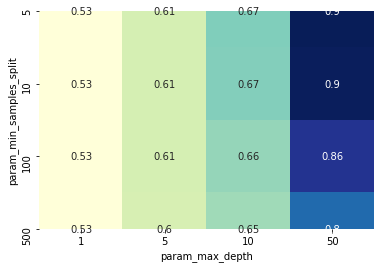

In [159]:
piv = pd.DataFrame(list(zip(s, d, train_auc)), 
               columns =['param_min_samples_split', 'param_max_depth','mean_train_score'])
piv = piv.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
ax = sns.heatmap(piv,annot=True, cmap="YlGnBu", cbar=False)
plt.show()

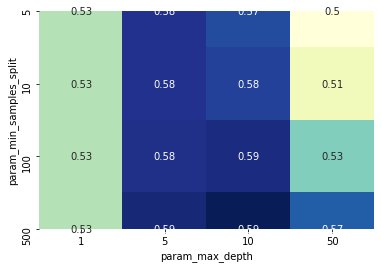

In [160]:
piv = pd.DataFrame(list(zip(s, d, cv_auc)), 
               columns =['param_min_samples_split', 'param_max_depth','mean_test_score'])
piv = piv.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
ax = sns.heatmap(piv,annot=True, cmap="YlGnBu", cbar=Falsemean_test_score)
plt.show()

In [161]:
a = clf.best_estimator_
print(a.max_depth)
print(a.min_samples_split)

10
500


In [162]:
clf.fit(X_tr_tfidf_w2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             pre

In [163]:
print(clf.best_estimator_)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(by=['param_max_depth','param_min_samples_split'])
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score']
d =  results['param_max_depth']
s =  results['param_min_samples_split']
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=d,y=s,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=d,y=s,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


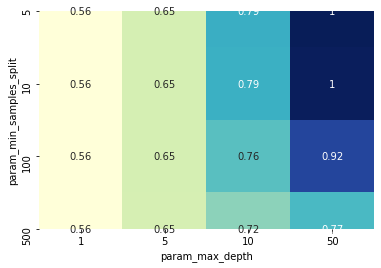

In [164]:
piv = pd.DataFrame(list(zip(s, d, train_auc)), 
               columns =['param_min_samples_split', 'param_max_depth','mean_train_score'])
piv = piv.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
ax = sns.heatmap(piv,annot=True, cmap="YlGnBu", cbar=False)
plt.show()

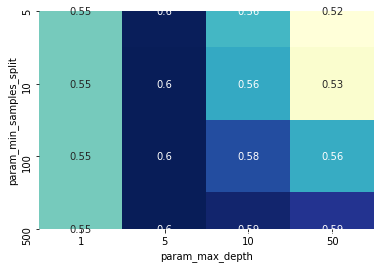

In [165]:
piv = pd.DataFrame(list(zip(s, d, cv_auc)), 
               columns =['param_min_samples_split', 'param_max_depth','mean_test_score'])
piv = piv.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
ax = sns.heatmap(piv,annot=True, cmap="YlGnBu", cbar = False)
plt.show()

In [166]:
b = clf.best_estimator_
print(b.max_depth)
print(b.min_samples_split)

5
10


In [167]:
from sklearn.metrics import roc_curve, auc


dt = DecisionTreeClassifier(max_depth=a.max_depth,min_samples_split=a.min_samples_split)
dt.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [168]:
y_train_pred = dt.predict_log_proba(X_tr)[:,1]
y_train_pred[:] = np.nan_to_num(y_train_pred)

In [169]:
print(X_tr.shape)
print(X_te.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_pred.shape)

(33500, 5101)
(16500, 5101)
(33500,)
(16500,)
(33500,)


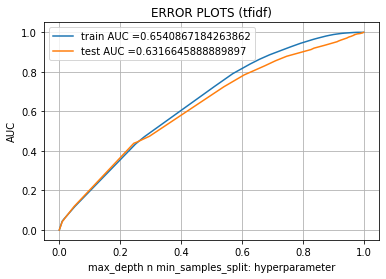

In [170]:
y_test_pred = dt.predict_log_proba(X_te)[:,1]
y_test_pred[:] = np.nan_to_num(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_tfidf = auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth n min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS (tfidf)")
plt.grid()
plt.show()

In [171]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [172]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.35583755660822514 for threshold -0.159
Train confusion matrix
[[ 2627  2738]
 [ 7689 20446]]
Test confusion matrix
[[ 1213  1429]
 [ 3814 10044]]


In [173]:
y_test_b = predict_with_best_t(y_test_pred, best_t)

In [174]:
# To single out the data points other than false positive
ind = list()
for i in range(len(y_test)):
    if y_test[i]==0 and y_test_b[i] == 1:
        continue
    ind.append(i)

In [175]:
#https://stackoverflow.com/questions/13077527/is-there-a-numpy-delete-equivalent-for-sparse-matrices
from scipy.sparse import csr_matrix
def delete_rows_csr(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSR sparse matrix ``mat``.
    """
    if not isinstance(mat, csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]

In [176]:
rs = X_test.drop(X_test.index[ind]) #getting the test data of the false positive data points only

In [177]:
rs.shape

(1429, 8)

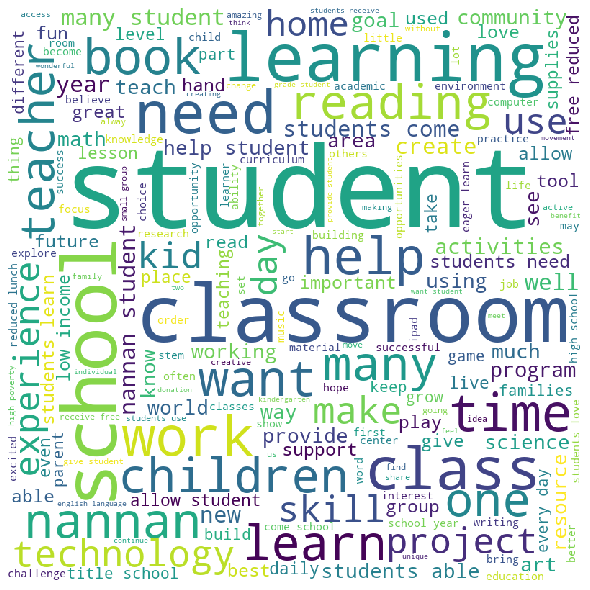

In [178]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in rs.essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

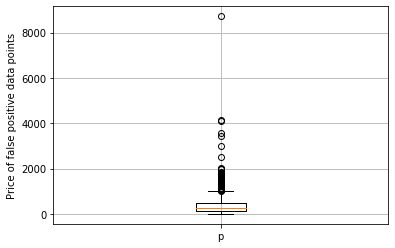

In [179]:
plt.boxplot([rs.price])
plt.xticks([1],('price'))
plt.ylabel('Price of false positive data points')
plt.grid()
plt.show()

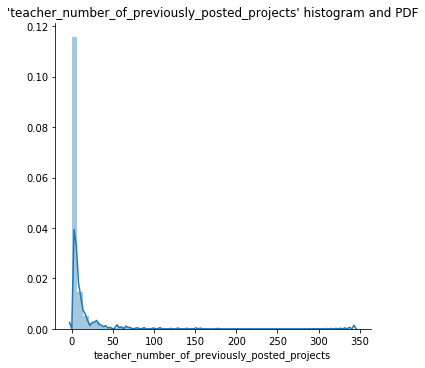

In [180]:
sns.FacetGrid(rs,  size=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title("'teacher_number_of_previously_posted_projects' histogram and PDF")
plt.show();

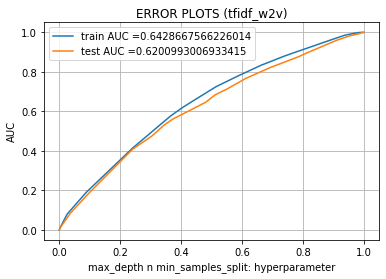

In [181]:
dt = DecisionTreeClassifier(max_depth=b.max_depth,min_samples_split=b.min_samples_split)
dt.fit(X_tr_tfidf_w2v , y_train)
y_train_pred = dt.predict_log_proba(X_tr_tfidf_w2v)[:,1]
y_train_pred[:] = np.nan_to_num(y_train_pred)
y_test_pred = dt.predict_log_proba(X_te_tfidf_w2v)[:,1]
y_test_pred[:] = np.nan_to_num(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_tfidf_w2v = auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth n min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS (tfidf_w2v)")
plt.grid()
plt.show()

In [182]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3688022682542945 for threshold -0.16
Train confusion matrix
[[ 3201  2164]
 [10744 17391]]
Test confusion matrix
[[1518 1124]
 [5510 8348]]


<h1> Task 2 </h1>

In [200]:
dt = DecisionTreeClassifier()
parameters = {'min_samples_split':[6000, 8000, 10000, 12000]}
clf = GridSearchCV(dt,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


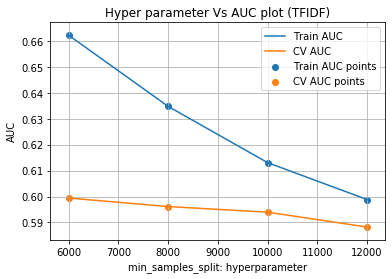

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.117829,5.219900,0.011091,0.000632,6000,{'min_samples_split': 6000},0.604688,0.604018,0.589562,0.599423,0.006978,1,0.694859,0.652547,0.639386,0.662264,0.023666
1,5.274341,5.032426,0.010775,0.000671,8000,{'min_samples_split': 8000},0.605960,0.601228,0.581199,0.596129,0.010732,2,0.679247,0.614847,0.610337,0.634810,0.031476
2,2.047512,0.629427,0.010421,0.000084,10000,{'min_samples_split': 10000},0.605458,0.599714,0.576743,0.593973,0.012406,3,0.625666,0.610086,0.603533,0.613095,0.009283
3,1.384925,0.158055,0.010348,0.000033,12000,{'min_samples_split': 12000},0.598617,0.599714,0.566332,0.588222,0.015484,4,0.599586,0.610086,0.586874,0.598849,0.009490


In [201]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(by=['param_min_samples_split'])
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score']
K =  results['param_min_samples_split']
# https://plot.ly/python/3d-axes/
plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (TFIDF)")
plt.grid()
plt.show()

results.head()

Note : As for the task 2 classifier, we are only considering one hyperparameter, ploting heatmap doesnt make sense.

In [202]:
dt = DecisionTreeClassifier(min_samples_split=clf.best_estimator_.min_samples_split)
dt.fit(X_tr , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [203]:
dt.feature_importances_.shape

(5101,)

In [204]:
c = np.where(dt.feature_importances_==0)[0] #for the other task
c

array([   0,    1,    2, ..., 5096, 5097, 5100])

In [205]:
#https://stackoverflow.com/questions/23966923/delete-columns-of-matrix-of-csr-format-in-python
all_cols = np.arange(X_tr.shape[1])
cols_to_keep = np.where(np.logical_not(np.in1d(all_cols, c)))[0]
m = X_tr[:, cols_to_keep] #training data for the other task

In [206]:
all_cols = np.arange(X_te.shape[1])
cols_to_keep = np.where(np.logical_not(np.in1d(all_cols, c)))[0]
m_te = X_te[:, cols_to_keep] #testing data for the other task

In [207]:
print(m.shape, m_te.shape,c.shape, X_tr.shape, X_te.shape)

(33500, 384) (16500, 384) (4717,) (33500, 5101) (16500, 5101)


In [208]:
dt = DecisionTreeClassifier(min_samples_split=clf.best_estimator_.min_samples_split)
dt.fit(m , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6000,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

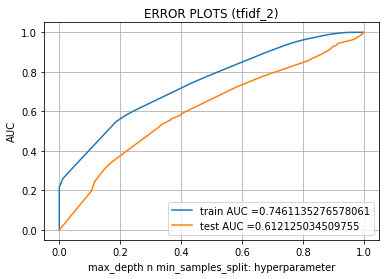

In [209]:
y_train_pred = dt.predict_log_proba(m)[:,1]
y_train_pred[:] = np.nan_to_num(y_train_pred)
y_test_pred = dt.predict_log_proba(m_te)[:,1]
y_test_pred[:] = np.nan_to_num(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_tfidf_2 = auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth n min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS (tfidf_2)")
plt.grid()
plt.show()

<h1>2. Summary</h1>

In [210]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectoriser", "Model", "Parameter 'max_depth'", "Parameter 'min_samples_split'", "AUC Score"]

x.add_row([" TFIDF ", "Brute", a.max_depth, a.min_samples_split, auc_tfidf])
x.add_row([" TFIDF_task_2 ", "Brute", "-", clf.best_estimator_.min_samples_split, auc_tfidf_2])
x.add_row([" TFIDF_W2V ", "Brute", b.max_depth, b.min_samples_split, auc_tfidf_w2v])
print(x)

+----------------+-------+-----------------------+-------------------------------+--------------------+
|   Vectoriser   | Model | Parameter 'max_depth' | Parameter 'min_samples_split' |     AUC Score      |
+----------------+-------+-----------------------+-------------------------------+--------------------+
|     TFIDF      | Brute |           10          |              500              | 0.6316645888889897 |
|  TFIDF_task_2  | Brute |           -           |              6000             | 0.612125034509755  |
|   TFIDF_W2V    | Brute |           5           |               10              | 0.6200993006933415 |
+----------------+-------+-----------------------+-------------------------------+--------------------+
